__Домашняя работа 6.__

In [1]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_diabetes(return_X_y=True)
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
def residual(y, z):
    return - (z - y)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    #return trees, train_errors, test_errors, max_depth
    return len(trees), train_errors[-1], test_errors[-1], max_depth

__Задание 1.__ Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [8]:
trees_f1 = []
train_errors_f1 = []
test_errors_f1 = []
max_depth_f1 = []

eta = 0.1
for i, n_trees in enumerate([1, 3, 5, 10, 30]):
        trees, train_errors, test_errors, depth = gb_fit(n_trees, 4, X_train, X_test, y_train, y_test, eta) 
        trees_f1.append(trees)
        train_errors_f1.append(train_errors)
        test_errors_f1.append(test_errors)
        max_depth_f1.append(depth)

In [9]:
trees_f2 = []
train_errors_f2 = []
test_errors_f2 = []
max_depth_f2 = []
eta = 0.1
for max_depth in range(1,6):
        trees, train_errors, test_errors, depth = gb_fit(5, max_depth, X_train, X_test, y_train, y_test, eta) 
        trees_f2.append(trees)
        train_errors_f2.append(train_errors)
        test_errors_f2.append(test_errors)
        max_depth_f2.append(depth)

In [18]:
def get_trees_plot(n_trees, train_err, test_err, depth):
    print(n_trees)
    plt.xlabel('trees')
    plt.ylabel('MSE')
    plt.xlim(0, max(n_trees))
    plt.plot(n_trees, train_err, label='train error')
    plt.plot(n_trees, test_err, label='test error')
    plt.legend(loc='upper right')
    plt.title(f'Деревьев={n_trees}, глубина={depth[0]}')
    plt.show()

In [19]:
def get_depth_plot(n_trees, train_err, test_err, depth):
    print(depth)
    plt.xlabel('depth')
    plt.ylabel('MSE')
    plt.xlim(1, max(depth))
    plt.plot(depth, train_err, label='train error')
    plt.plot(depth, test_err, label='test error')
    plt.legend(loc='upper right')
    plt.title(f'Деревьев={n_trees[0]}, глубина={depth}')
    plt.show()

[1, 3, 5, 10, 30]


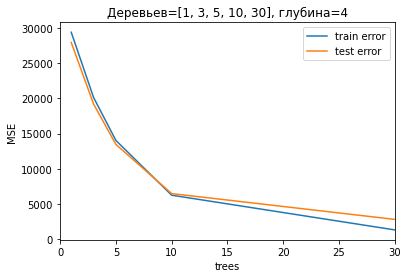

In [20]:
get_trees_plot(trees_f1, train_errors_f1, test_errors_f1, max_depth_f1)

[1, 2, 3, 4, 5]


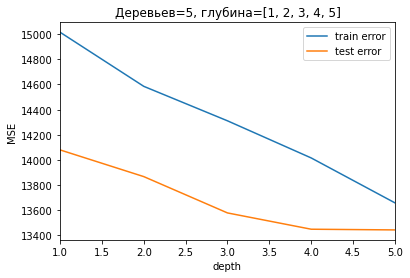

In [21]:
get_depth_plot(trees_f2, train_errors_f2, test_errors_f2, max_depth_f2)

С ростом глубины ошибка падает более равномерно, а с ростом количества деревьев выходит на асимптоту